In [48]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [49]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()  # split into tetsing and training

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

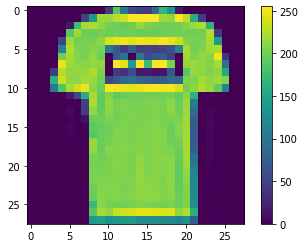

In [51]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
#plt.grid(False)
plt.show()

In [52]:
# so values are between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3). 'softmax' means output has to be between 0 to 1
    # output layer suppose to have as many as neurons as possible,
    # at here we use 10 because that is the number of classes (class_names.length == 10)
])

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6282 - accuracy: 0.7826
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3156 - accuracy: 0.8827
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2989 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2881 - accuracy: 0.8927
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2650 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8849
Test accuracy: 0.8848999738693237


In [57]:
predict = model.predict(test_images)

print(predict) # raw data, each row's length is same to number of classes, and each number is the possibility of being that class

[[7.01425847e-07 2.95838277e-07 1.45181900e-07 ... 4.81034908e-03
  3.36121153e-09 9.95112956e-01]
 [1.51270815e-05 5.65369002e-11 9.74308908e-01 ... 5.41433557e-14
  9.27434587e-11 2.96772372e-13]
 [2.16279261e-08 1.00000000e+00 4.12295388e-13 ... 4.54151786e-20
  9.90363833e-11 6.31381428e-21]
 ...
 [4.65607718e-06 1.11898919e-11 1.23084783e-06 ... 8.67618652e-08
  9.99708951e-01 1.59642195e-11]
 [6.39913296e-08 9.99931097e-01 9.95503072e-12 ... 4.29951859e-16
  8.96897063e-08 9.22185776e-15]
 [1.20750874e-05 5.46231860e-08 7.22929963e-06 ... 8.76673672e-04
  2.15535347e-05 6.55153326e-06]]


In [58]:
predict = [np.argmax(p) for p in predict]

print(predict) # raw data, each row's length is same to number of classes, and each number is the possibility of being that class

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 9, 2, 1, 6, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 6, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 4, 8, 5, 4, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 4, 2, 4, 9, 7, 6, 5, 5, 4, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 0, 4, 0, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 6, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 9, 0, 

Trouser


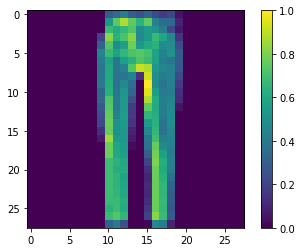

In [59]:
print(class_names[predict[137]])
plt.figure()
plt.imshow(train_images[137])
plt.colorbar()
#plt.grid(False)
plt.show()

Pick a number: 100


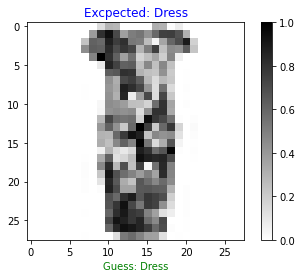

In [67]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label, color='b')
  plt.xlabel("Guess: " + guess, color='g')
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
